Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **5. studenog 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Točnost modela: 1.0


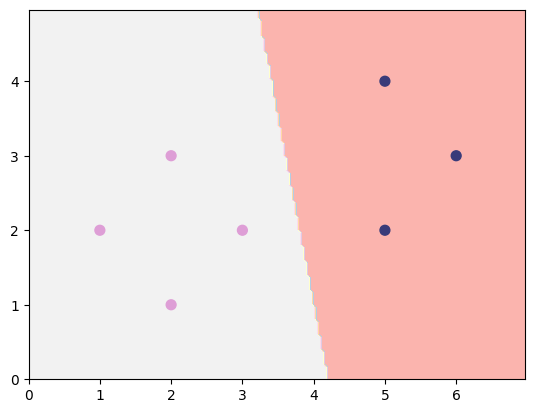

In [5]:
# Vaš kôd ovdje


clf = RidgeClassifier(alpha=0).fit(seven_X, seven_y)

print("Točnost modela:", accuracy_score(seven_y, clf.predict(seven_X)))
plot_2d_clf_problem(seven_X, seven_y, clf.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

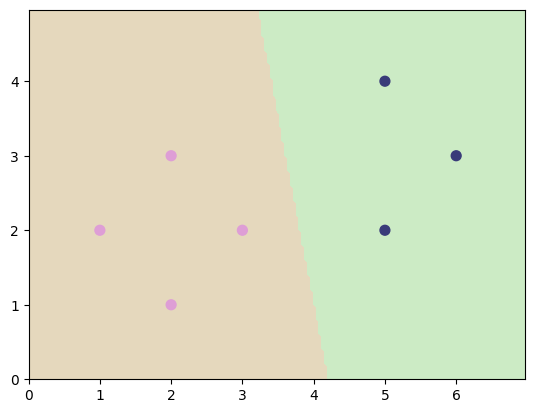

In [6]:
# Vaš kôd ovdje
plot_2d_clf_problem(seven_X, seven_y, lambda x: clf.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Točnost modela: 0.875


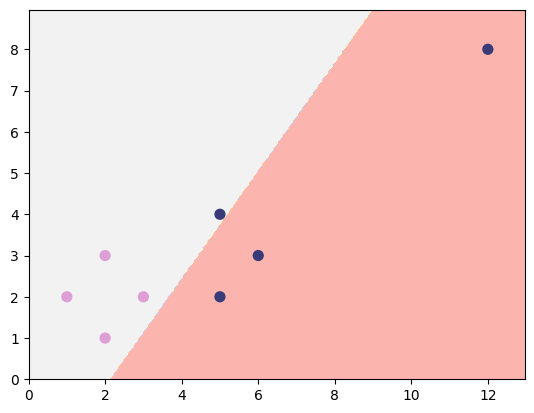

In [8]:
# Vaš kôd ovdje

clf = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)

print("Točnost modela:", accuracy_score(outlier_y, clf.predict(outlier_X)))
plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Točnost modela: 0.875


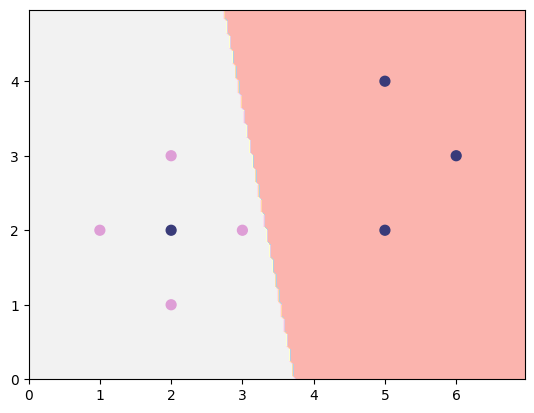

In [10]:
# Vaš kôd ovdje

clf = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)

print("Točnost modela:", accuracy_score(unsep_y, clf.predict(unsep_X)))
plot_2d_clf_problem(unsep_X, unsep_y, clf.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

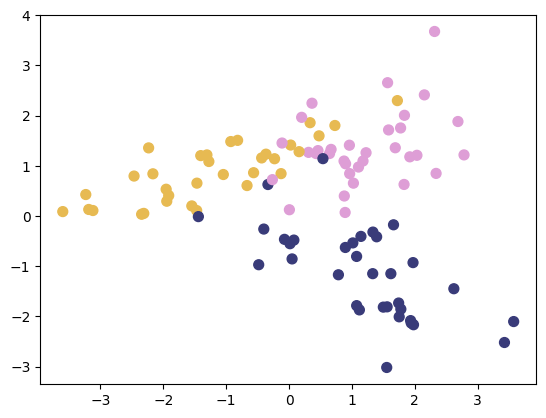

In [11]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1)
plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Točnost OVO: 0.85
Točnost OVR: 0.87
Točnost RidgeClassifier modela: 0.87


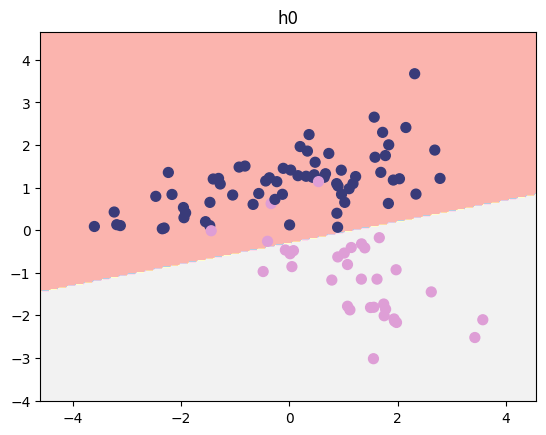

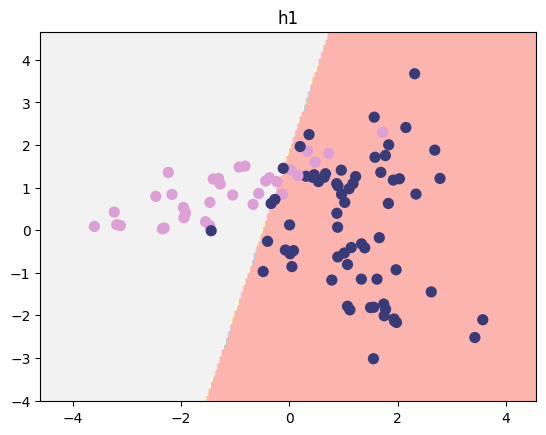

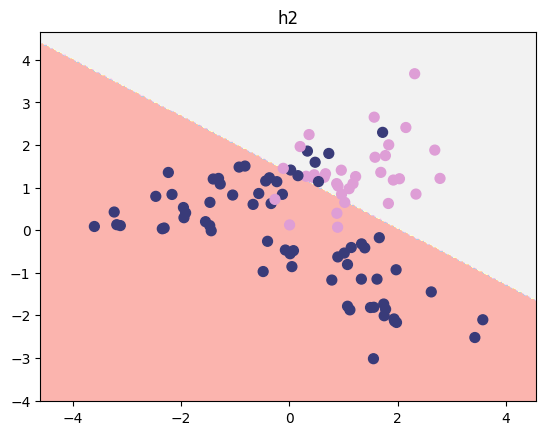

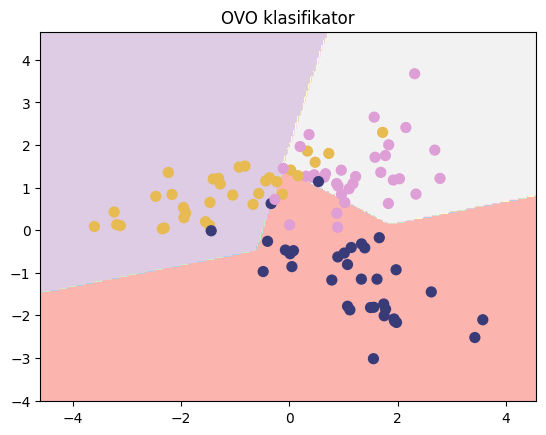

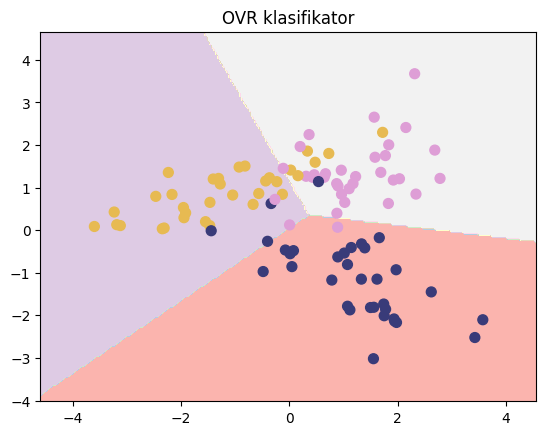

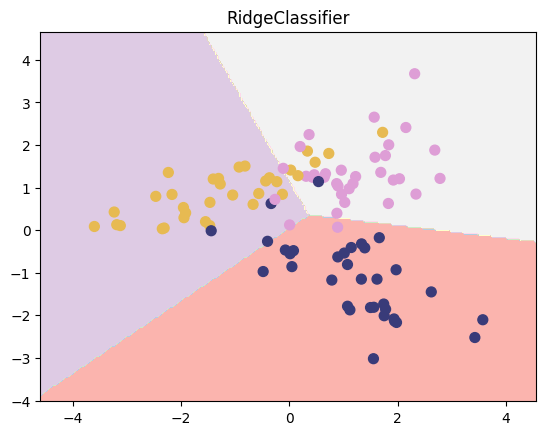

In [12]:
# Vaš kôd ovdje
h = []
p = []

for k in range(3):
    yi = np.array([1 if yi == k else 0 for yi in y])
    clf = RidgeClassifier(alpha=0).fit(X, yi)
    
    plt.figure()
    plt.title(f"h{k}")
    plot_2d_clf_problem(X, yi, clf.predict)
    
    h.append(clf.decision_function)
    p.append(clf.predict)

def ovr_predict(X):
    pred = np.array([hi(X) for hi in h])
    return np.argmax(pred, axis=0)

def ovo_predict(X):
    pred = np.array([pi(X) for pi in p])
    return np.argmax(pred, axis=0)

plt.figure()
print("Točnost OVO:", accuracy_score(y, ovo_predict(X)))
plt.title("OVO klasifikator")
plot_2d_clf_problem(X, y, ovo_predict)

plt.figure()
print("Točnost OVR:", accuracy_score(y, ovr_predict(X)))
plt.title("OVR klasifikator")
plot_2d_clf_problem(X, y, ovr_predict)


clf = RidgeClassifier(alpha=0).fit(X, y)
print("Točnost RidgeClassifier modela:", accuracy_score(y, clf.predict(X)))

plt.figure()
plt.title("RidgeClassifier")
plot_2d_clf_problem(X, y, clf.predict)

plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

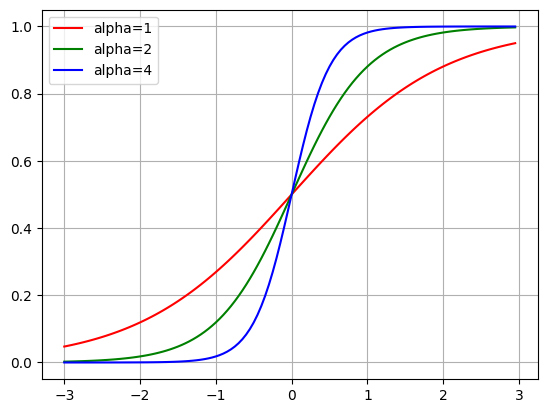

In [13]:
# Vaš kôd ovdje
def sigmoid(x, alpha=1):
  return 1 / (1 + np.exp(-alpha * x))

x = np.arange(-3, 3, 0.05)

plt.plot(x, sigmoid(x), 'r', label="alpha=1")
plt.plot(x, sigmoid(x, 2), 'g', label="alpha=2")
plt.plot(x, sigmoid(x, 4), 'b', label="alpha=4")

plt.grid()
plt.legend(loc="best")

plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [14]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w):
    if len(x.shape) == 1:
        return sigmoid(w[0] + w[1::].dot(x.reshape(-1, 1))[0])
    else:
        one = np.ones((len(x), 1))
        fi = np.c_[one, x].transpose()
        return sigmoid(w.dot(fi))

def cross_entropy_error(X, y, w):
    N = len(X)
    sum = 0

    for i in range(N):
        yi = y[i]
        h = lr_h(X[i], w)
        
        sum += -yi * np.log(h) - (1 - yi) * np.log(1 - h)
    
    return 1/N * sum


def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False, log=False):
    trace_w = []

    poly = PolynomialFeatures(1)
    FI = poly.fit_transform(X)

    w = np.zeros(FI.shape[1])
    
    for k in range(max_iter):
        
        #Calc error
        delta_w = np.zeros(FI.shape[1])
        for i in range(FI.shape[0]):
            h = lr_h(X[i], w)
            delta_w = delta_w - (h - y[i]) * FI[i]

        #Check if delta_w < epsilon
        if np.max(abs(delta_w)) < epsilon:
            if log:
                print(f"Threashold reached: delta_w {np.max(delta_w)} < epsilon {epsilon}")
            break
        
        #Calc update
        regularisation = eta * alpha * w
        regularisation[0] = 0
        
        update = -regularisation + eta * delta_w

        #Update and append
        w = w + update

        if trace:
            trace_w.append(w)
        
    # Return w and conditional trace_w
    if trace:
        return w, trace_w
    else:
        return w


### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [15]:
import numpy as np

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

seven_X.shape[1]

2

Cross entropy error: 0.020232686147420933


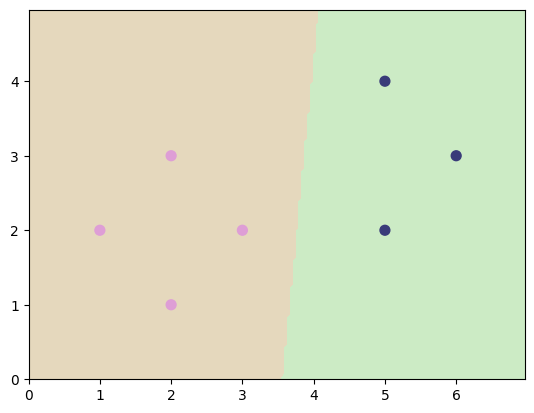

In [16]:
# Vaš kôd ovdje
w = lr_train(seven_X, seven_y, max_iter=10000, log=True)

print("Cross entropy error:", cross_entropy_error(seven_X, seven_y, w))
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w) >= 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [17]:
from sklearn.metrics import zero_one_loss

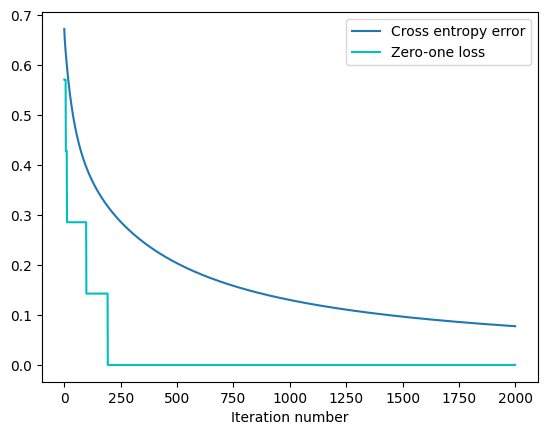

In [18]:
# Vaš kôd ovdje
w, w_trace = lr_train(seven_X, seven_y, trace=True)

cross_trace = [cross_entropy_error(seven_X, seven_y, w) for w in w_trace]
zero_one_trace = [zero_one_loss(seven_y, lr_h(seven_X, w) >= 0.5) for w in w_trace]

plt.xlabel("Iteration number")
plt.plot(cross_trace, label="Cross entropy error")
plt.plot(zero_one_trace, c='c', label="Zero-one loss")
plt.legend(loc="best")
plt.show()

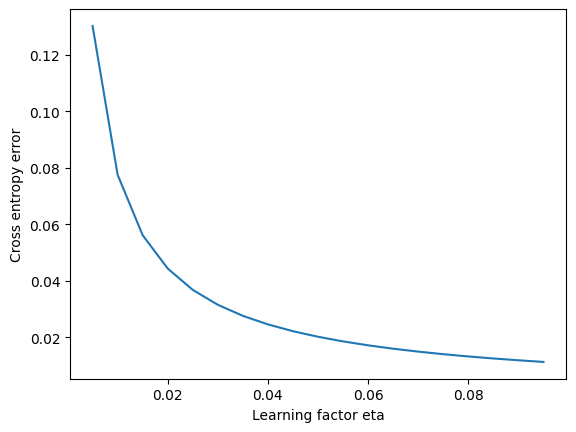

In [19]:
eta_arr = np.arange(0.005, 0.1, 0.005)
w_eta = [lr_train(seven_X, seven_y, eta=eta) for eta in eta_arr]
cross_eta = [cross_entropy_error(seven_X, seven_y, w) for w in w_eta]

plt.plot(eta_arr, cross_eta)
plt.xlabel("Learning factor eta")
plt.ylabel("Cross entropy error")
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Sklearn cross entropy error: 0.13883567936315613
My cross entropy error: 0.07751718252492557


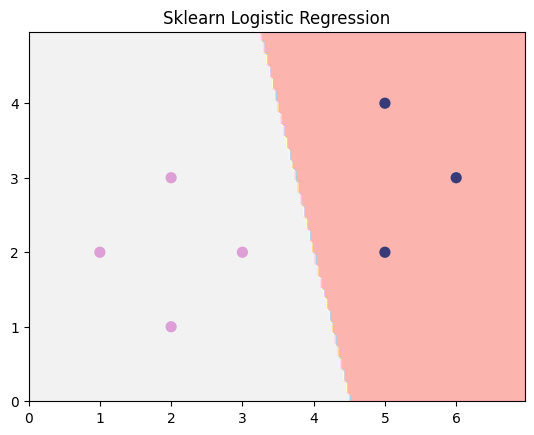

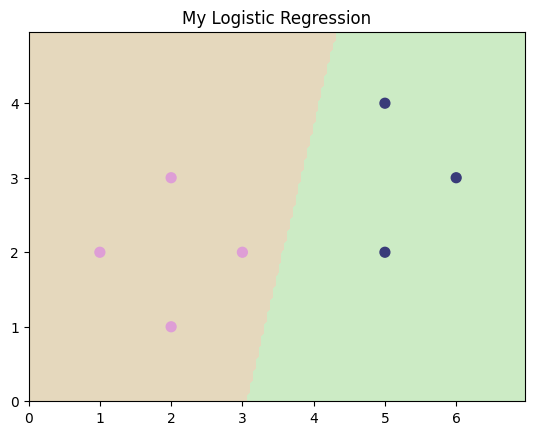

In [20]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
clf = LogisticRegression().fit(seven_X, seven_y)

w_sklearn = np.append(clf.intercept_, clf.coef_)
w_my = lr_train(seven_X, seven_y)

print("Sklearn cross entropy error:", cross_entropy_error(seven_X, seven_y, w_sklearn))
print("My cross entropy error:", cross_entropy_error(seven_X, seven_y, w_my))

plt.title("Sklearn Logistic Regression")
plot_2d_clf_problem(seven_X, seven_y, clf.predict)

plt.figure()
plt.title("My Logistic Regression")
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w_my) >= 0.5)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [21]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

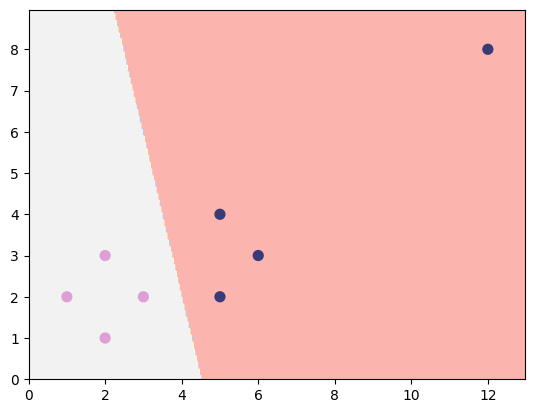

In [22]:
# Vaš kôd ovdje
clf = LogisticRegression().fit(outlier_X, outlier_y)

plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

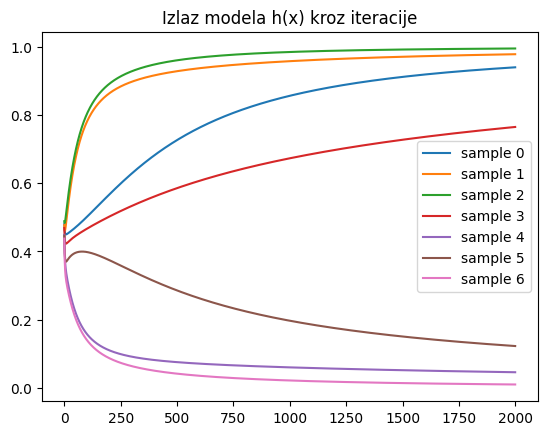

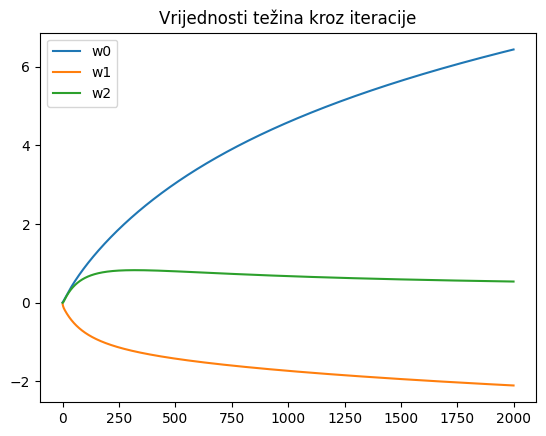

In [23]:
# Vaš kôd ovdje
w, w_trace = lr_train(seven_X, seven_y, trace=True)

plt.title("Izlaz modela h(x) kroz iteracije")
for i, x in enumerate(seven_X):
    h = [lr_h(x, w) for w in w_trace]
    name = f"sample {i}"
    plt.plot(h, label=name)
plt.legend(loc="best")

w_trace = np.array(w_trace)

plt.figure()
plt.title("Vrijednosti težina kroz iteracije")

plt.plot(w_trace[::, 0:1:], label="w0")
plt.plot(w_trace[::, 1:2:], label="w1")
plt.plot(w_trace[::, 2::], label="w2")

plt.legend(loc="best")

plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [24]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

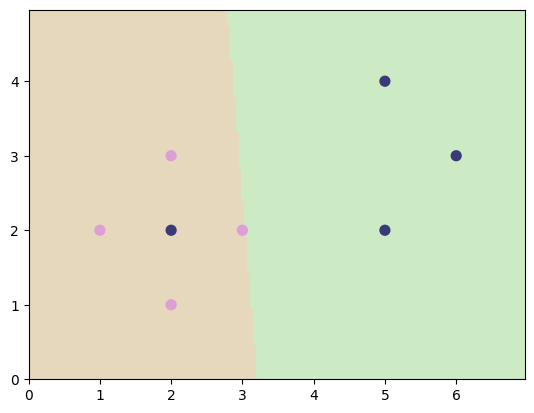

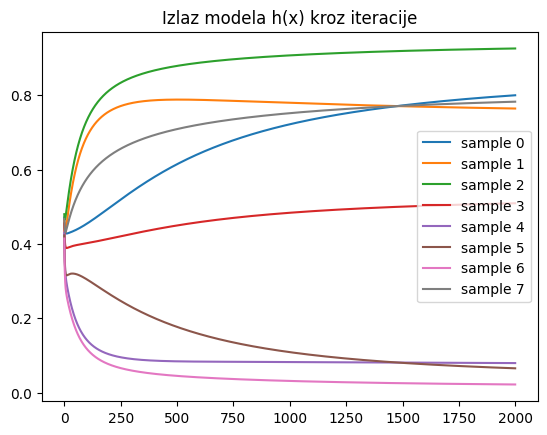

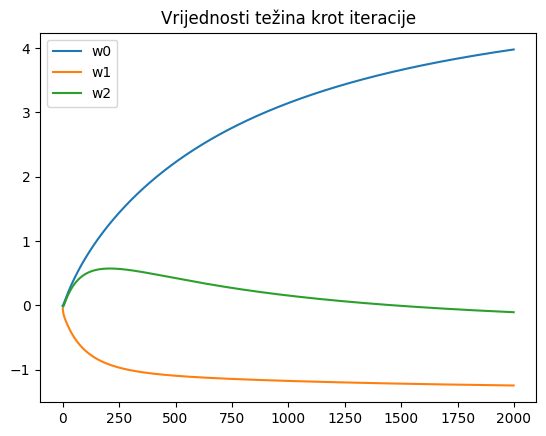

In [25]:
# Vaš kôd ovdje
w, w_trace = lr_train(unsep_X, unsep_y, trace=True)

plot_2d_clf_problem(unsep_X, unsep_y, lambda x: lr_h(x, w) >= 0.5)

plt.figure()
plt.title("Izlaz modela h(x) kroz iteracije")
for i, x in enumerate(unsep_X):
    h = [lr_h(x, w) for w in w_trace]
    name = f"sample {i}"
    plt.plot(h, label=name)
plt.legend(loc="best")

w_trace = np.array(w_trace)

plt.figure()
plt.title("Vrijednosti težina krot iteracije")

plt.plot(w_trace[::, 0:1:], label="w0")
plt.plot(w_trace[::, 1:2:], label="w1")
plt.plot(w_trace[::, 2::], label="w2")

plt.legend(loc="best")

plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [26]:
from numpy.linalg import norm

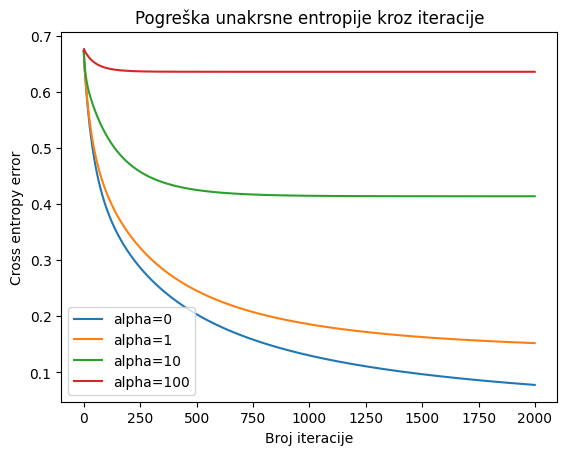

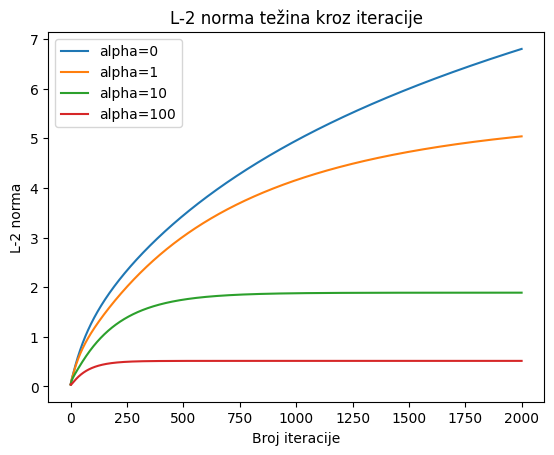

In [27]:
# Vaš kôd ovdje
w, w_trace_0 = lr_train(seven_X, seven_y, trace=True, alpha=0)
w, w_trace_1 = lr_train(seven_X, seven_y, trace=True, alpha=1)
w, w_trace_10 = lr_train(seven_X, seven_y, trace=True, alpha=10)
w, w_trace_100 = lr_train(seven_X, seven_y, trace=True, alpha=100)

plt.title("Pogreška unakrsne entropije kroz iteracije")
plt.plot([cross_entropy_error(seven_X, seven_y, w) for w in w_trace_0], label="alpha=0")
plt.plot([cross_entropy_error(seven_X, seven_y, w) for w in w_trace_1], label="alpha=1")
plt.plot([cross_entropy_error(seven_X, seven_y, w) for w in w_trace_10], label="alpha=10")
plt.plot([cross_entropy_error(seven_X, seven_y, w) for w in w_trace_100], label="alpha=100")
plt.xlabel("Broj iteracije")
plt.ylabel("Cross entropy error")
plt.legend(loc="best")


plt.figure()
plt.title("L-2 norma težina kroz iteracije")
plt.plot([norm(w) for w in w_trace_0], label="alpha=0")
plt.plot([norm(w) for w in w_trace_1], label="alpha=1")
plt.plot([norm(w) for w in w_trace_10], label="alpha=10")
plt.plot([norm(w) for w in w_trace_100], label="alpha=100")
plt.xlabel("Broj iteracije")
plt.ylabel("L-2 norma")
plt.legend(loc="best")

plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [28]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

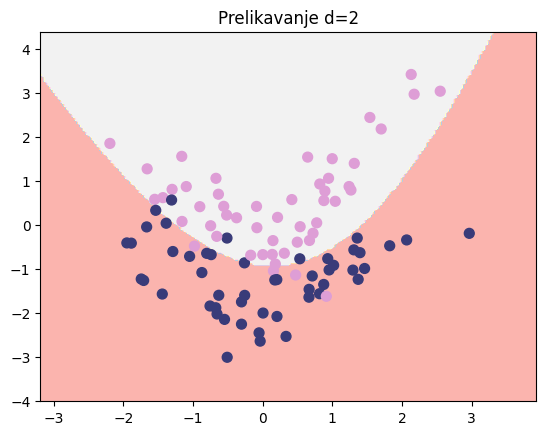

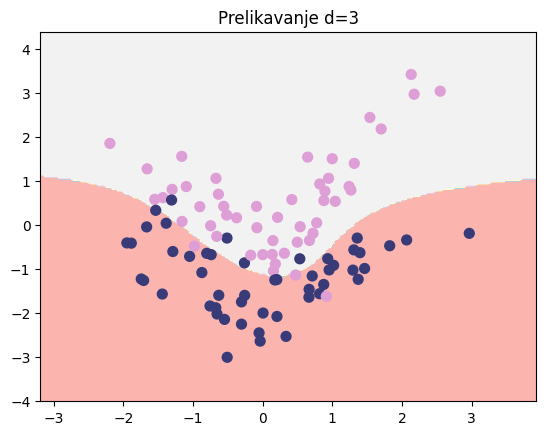

In [31]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2)

poly = PolynomialFeatures(degree=2)
clf = LogisticRegression().fit(poly.fit_transform(X), y)

plt.title("Prelikavanje d=2")
plot_2d_clf_problem(X, y, lambda x : clf.predict(poly.transform(x)))

poly = PolynomialFeatures(degree=3)
clf = LogisticRegression().fit(poly.fit_transform(X), y)

plt.figure()
plt.title("Prelikavanje d=3")
plot_2d_clf_problem(X, y, lambda x : clf.predict(poly.transform(x)))

plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?